In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

In [39]:
# UNQ_C1
# GRADED FUNCTION: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
        dist=[]
        for j in range(centroids.shape[0]):
            norm=np.linalg.norm(X[i]-centroids[j])
            dist.append(norm)
        
        min =1000
        minind=0
        
        for k in range(centroids.shape[0]):
            if(dist[k]<min):
                min=dist[k]
                minind=k
                
        idx[i]=minind
        
     ### END CODE HERE ###
    
    return idx

In [40]:
# Load an example dataset that we will be using
X = load_data()

In [41]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [42]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

# UNIT TEST
from public_tests import *

find_closest_centroids_test(find_closest_centroids)

First three elements in idx are: [0 2 1]
All tests passed!


In [47]:
# UNQ_C2
# GRADED FUNCTION: compute_centroids

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for i in range(K):
        count=0
        sum=0
        for j in range(X.shape[0]):
            if(idx[j]==i):
                sum+=X[j]
                count+=1
        sum/=count        
        
        centroids[i]=sum
        
    ### END CODE HERE ## 
    
    return centroids

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
* Here's how you can structure the overall implementation for this function
    ```python 
    def compute_centroids(X, idx, K):
        # Useful variables
        m, n = X.shape
    
        # You need to return the following variables correctly
        centroids = np.zeros((K, n))
    
        ### START CODE HERE ###
        for k in range(K):   
            points = # Your code here to get a list of all data points in X assigned to centroid k  
            centroids[k] = # Your code here to compute the mean of the points assigned
    ### END CODE HERE ## 
    
    return centroids
    ```
  
    If you're still stuck, you can check the hints presented below to figure out how to calculate `points` and `centroids[k]`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate points</b></font></summary>
           &emsp; &emsp; Say we wanted to find all the values in X that were assigned to cluster <code>k=0</code>. That is, the corresponding value in idx for these examples is 0. In Python, we can do it as <code>X[idx == 0]</code>. Similarly, the points assigned to centroid <code>k=1</code> are <code>X[idx == 1]</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate points</b></font></summary>
               &emsp; &emsp; You can compute points as <code>points = X[idx == k] </code>
           </details>
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate centroids[k]</b></font></summary>
          &emsp; &emsp; You can use <a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html">np.mean</a> to find the mean. Make sure to set the parameter <code>axis=0</code> 
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate centroids[k]</b></font></summary>
              &emsp; &emsp; You can compute centroids[k] as <code>centroids[k] = np.mean(points, axis = 0)</code>
          </details>
    </details>
        
    </details>

</details>

    


Now check your implementation by running the cell below

In [48]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


**Expected Output**:

2.42830111 3.15792418

5.81350331 2.63365645

7.11938687 3.6166844 

In [49]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


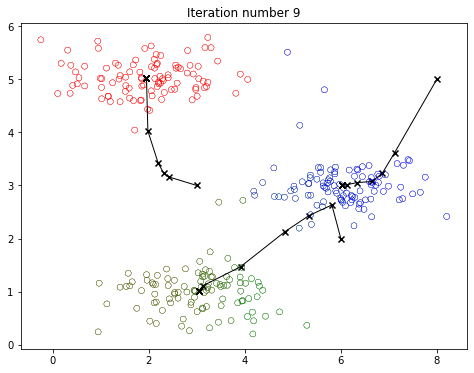

In [50]:
# Load an example dataset
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [51]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


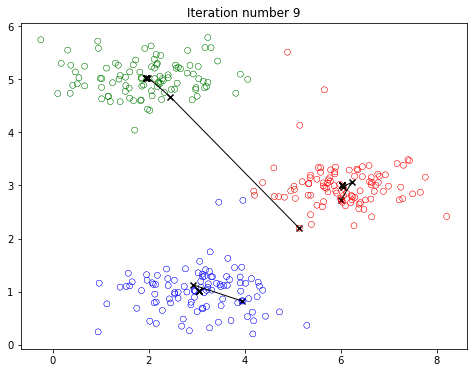

In [56]:
# Run this cell repeatedly to see different outcomes.

# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

In [57]:
# Load an image of a bird
original_img = plt.imread('bird_small.png')

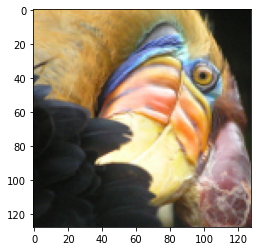

In [58]:
# Visualizing the image
plt.imshow(original_img)

In [59]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


In [61]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [62]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 576x432 with 0 Axes>

In [63]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [12 12 12 12 12]


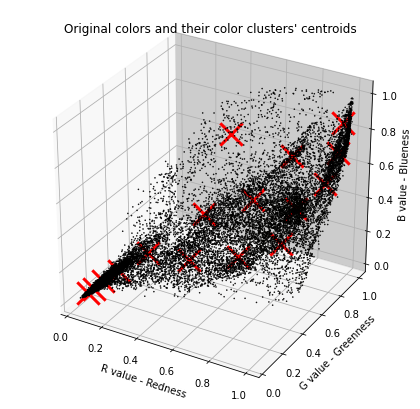

In [64]:
# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

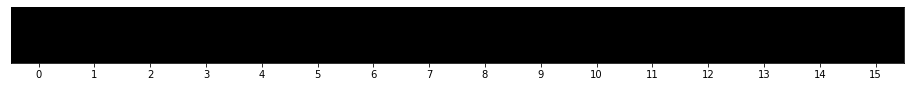

In [65]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

In [66]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

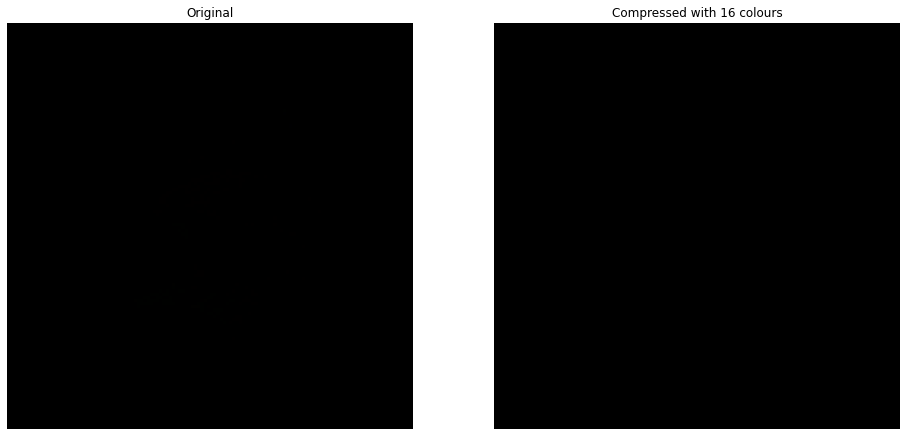

In [68]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()